## Investments Module 2

#### Risk Aversion
* Most investors are risk averse
* more risk increases expectation of risk premium; excess return above risk-free rate

###### Speculation vs. Gambling
* Speculation involved taking risk for expected gain
* With speculation, one has made a decision based on the risk-return trade-ff
* Gambling involves an uncertain outcome
* With gambling, risk is taken for enjoyment

###### Utility
* Utility from an investor's perspective is a result of a combination of risk-free returns, risk, and risk premium returns
* Utility can be measured using a utility function:

* $U = E(r) - \frac{1}{2}A\sigma^{2}$
 
    - $U$ = Utility   
    
    - $E(r)$ = Expected return on the asset or portfolio
    
    - $A$ = Coefficient of risk aversion
    
    - $\sigma^{2}$ = Variance of returns
    
    - $\frac{1}{2}$ = A scaling factor

###### Coefficient of Risk Aversion
* $A$ in the utility equation represents an investor's tolerence for risk, the higher, the coefficient, the more risk averse the investor
* When $A = 0$, the investor is risk neutral
* When $A < 1$, the investor seeks risk





In [1]:
suppressMessages(library(data.table))
suppressMessages(library(tidyverse))

##function for utility calculation

investor_utility <- function(expected_return, risk_aversion, variance, stdev = F){
if(stdev){
    variance = variance^2
}
    utility <- expected_return - (.5 * risk_aversion * variance)
    utility
}

##table for different types of investors based on risk aversion coefficient
investors <- data.table(`investors (A)` = c(2,3.5,5))

##portfolio L has an E(r) = 0.07, stdev = .05
portfolioL <- sapply(investors$`investors (A)`, FUN = function(x) investor_utility(expected_return = .07, risk_aversion = x, variance = .05, stdev = T))
investors[,portfolioL := portfolioL]

##portfolio M has an E(r) = 0.09, stdev = .10
portfolioM <- sapply(investors$`investors (A)`, FUN = function(x) investor_utility(expected_return = .09, risk_aversion = x, variance = .1, stdev = T))
investors[,portfolioM := portfolioM]

##portfolio H has an E(r) = 0.13, stdev = .20
portfolioH <- sapply(investors$`investors (A)`, FUN = function(x) investor_utility(expected_return = .13, risk_aversion = x, variance = .2, stdev = T))
investors[,portfolioH := portfolioH]

investors


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


investors (A),portfolioL,portfolioM,portfolioH
<dbl>,<dbl>,<dbl>,<dbl>
2.0,0.067500,0.0800,0.09
3.5,0.065625,0.0725,0.06
5.0,0.063750,0.0650,0.03


* Utility decreases as risk aversion (A) increases
* Although expected return increases utility, at some point the added risk counteracts the expected return and utility goes down
* what is the combination of expected return and sigma and A that yields the highest utility
* Risk Aversion (A) is a theoreticle construct, it is estimated but not measurable



##### Indifference Curves

* Indifference curve connects all points on the mean return-standard deviation line that have the same level of utility
    - As sigma and E(r) changes, all points on the indifference curve have the same utility
* To calculate indefference curves, hold A and utility constant for a given investor and calculate E(r) for a given sigma     

In [2]:
## function for expected return given variance, utility and risk aversion held constant
investor_return <- function(utility, risk_aversion, variance, stdev = F){
    if(stdev){
        variance = variance^2
    }
    expected_return <- utility + (.5 * risk_aversion * variance)
    expected_return
}

indifference_curves <- data.table(sigma = seq(0.01,1,by = .01))

##A = 2, U = 0.05
indifference_curves[,`A=2;U=.05` := sapply(sigma, FUN = function(x) investor_return(utility = 0.05, risk_aversion = 2, variance = x, stdev = T))]

##A = 2, U = 0.09
indifference_curves[,`A=2;U=.09` := sapply(sigma, FUN = function(x) investor_return(utility = 0.09, risk_aversion = 2, variance = x, stdev = T))]

##A = 4, U = 0.05
indifference_curves[,`A=4;U=.05` := sapply(sigma, FUN = function(x) investor_return(utility = 0.05, risk_aversion = 4, variance = x, stdev = T))]

##A = 4, U = 0.09
indifference_curves[,`A=4;U=.09` := sapply(sigma, FUN = function(x) investor_return(utility = 0.09, risk_aversion = 4, variance = x, stdev = T))]

indifference_curves


sigma,A=2;U=.05,A=2;U=.09,A=4;U=.05,A=4;U=.09
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01,0.0501,0.0901,0.0502,0.0902
0.02,0.0504,0.0904,0.0508,0.0908
0.03,0.0509,0.0909,0.0518,0.0918
0.04,0.0516,0.0916,0.0532,0.0932
0.05,0.0525,0.0925,0.0550,0.0950
0.06,0.0536,0.0936,0.0572,0.0972
0.07,0.0549,0.0949,0.0598,0.0998
0.08,0.0564,0.0964,0.0628,0.1028
0.09,0.0581,0.0981,0.0662,0.1062


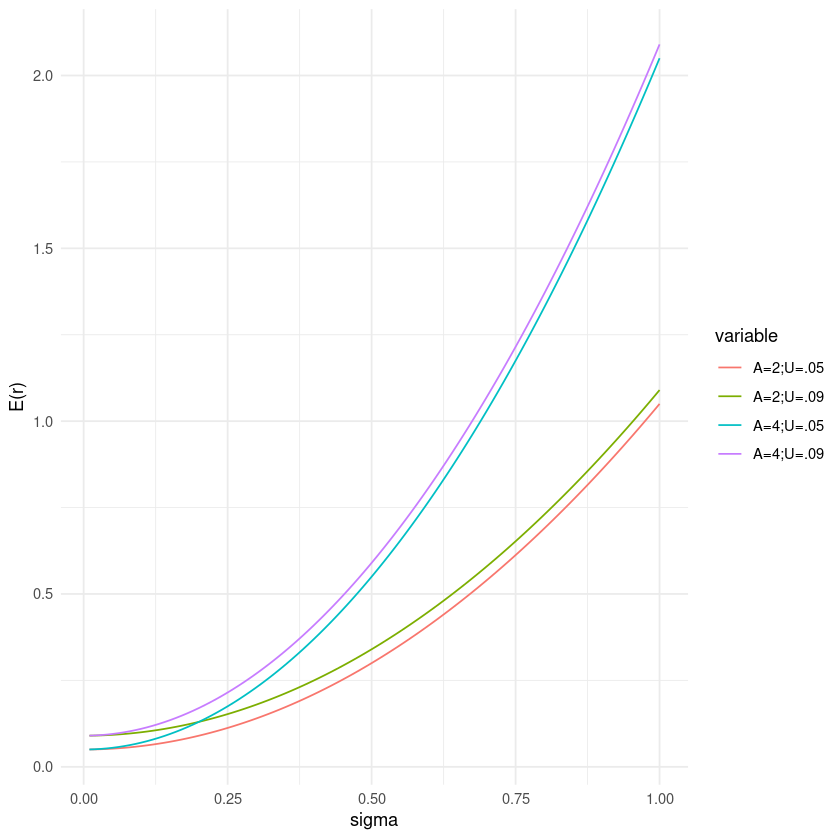

In [3]:
ggplot(indifference_curves %>% melt(id.vars = "sigma") ) + aes(x = sigma, y = value, colour = variable) + geom_line(size = 0.5) + labs(x = "sigma", y = "E(r)") + scale_color_hue(direction = 1) + theme_minimal()

##### Capital Allocation Across Risky and Risk-Free Portfolios

* manipulate ratio of money committed to risky assets vs. risk-free asset
* amoung risky securities, select investments with higher or lower risk and/or higher or lower diversification 



#### Investment Opportunity Set

* With a risky asset, P, and a riskless asset, F, we can vary weight, y, to end up on any point on the Capital Allocation Line

###### Example: One Risky Asset and a Risk-Free Asset

* Assume:

    - $r_{f} = 7\%$
    - $\sigma_{rf} = 0\%$
    - $E(r_{p}) = 15\%$
    - $\sigma_{p} = 22\%$

    - y is the weight of _risky_ portfolio, P, in the complete portfolio; the expected return of the complete return is defined as:

        - $E(r_{c}) = 15y + (1-y)7 = 7 + y * (15-7)$
        - $E(r_{c} = 8y + 7$

    - The risk of the complete portfolio:

        - $\sigma_{c} = y * \sigma{p} = 22y$

    - solve for y in terms of sigma (dependent variable) and replace into expected return formula
        
        - $\sigma{c} = 22y$
        - $y = \frac{\sigma_{c}}{22}$
        - $E(r_{c}) = \frac{8\sigma_{c}}{22} + 7$

        - slope = $\frac{E(r_{p}) - r_{f}}{\sigma_{p}} = \frac{8}{22}$

            - slope for the capital allocation line is the __sharpe ratio__





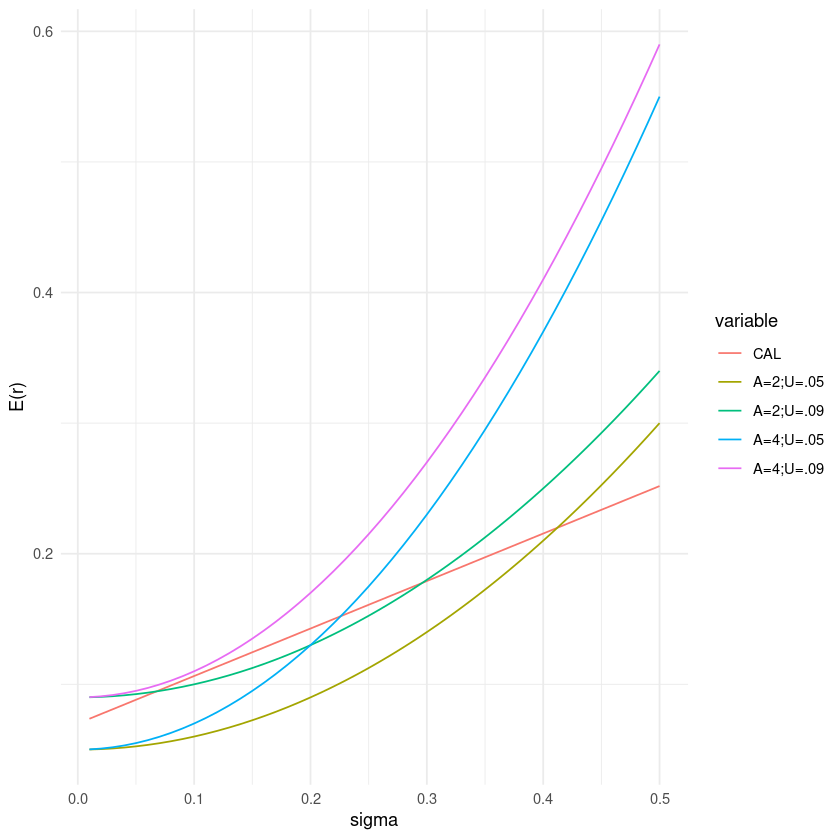

In [4]:
##build capital allocation line for above example

CAL <- function(sigma, rf = .07, sigma_rf = 0, expected_return_risk = .15, sigma_risk = .22){
    expected_return_complete <- (((expected_return_risk - rf)/sigma_risk) * sigma) + rf
    expected_return_complete
}

cal_table <- data.table(sigma = seq(.01,0.5,by = .01))
cal_table[,CAL := sapply(sigma, FUN = function(x) CAL(sigma = x))]

##merge cal with utility lines from before
cal_table <- merge(cal_table,indifference_curves, by = "sigma", all = F)

ggplot(cal_table %>% melt(id.vars = "sigma") ) + aes(x = sigma, y = value, colour = variable) + geom_line(size = 0.5) + labs(x = "sigma", y = "E(r)") + scale_color_hue(direction = 1) + theme_minimal()


* The Capital Allocation Line above represents all available investments
* The various utility curves represent different types of investors
* The point where the utility indiffernce curve touches the CAL represents the most optimal portfolio
    - from that point, you have sigma of the complete portfolio and E(r) of the complete portfolio, given the specifications of expected returns of the risky portfolion and the risk free rate you can work backwords and calculate the allocation, y


##### Capital Market Line (CML)

* CML is a capital allocation line formed by investments in two passive portfolios
    - risk free
    - Market index fund



#### Efficient Diversification

##### Investment Decision

* Capital Allocation: allocating b/w risky and risk-free
* Asset allocation: within risky portfolio, allocate across risky asset classes
* Security selection: selecting individual assets within asset classes

* Portfolio risk can be decomposed to market risk (systematic risk) and firm-specific risk (ideosyncratic risk)
* By diversifing across 20-25 stocks, much of the ideosyncratic risk has been diversified out

##### Portfolio of 2 Risky Assets

* Consider the E(r) of each asset and the variances/standard deviations of the assets as well as the covariance b/w the assets

* Expected Value of a portfolio of 2 Risky Assets:

    - $E(r_{p}) = w_{D}E(r{D}) + w_{E}E(r_{E})$

        - $r_{p}$ = rate of return of the portfolio
        - $w_{D}$ = weight of the bond fund
        - $w_{E}$ = weight of the equity fund
        - $r_{D}$ = return of the bond fund
        - $r_{E}$ = return of the equity fund

* Portfolio risk (variance) of 2 risky assets:

    - $\sigma_{p}^{2} = w_{D}^{2}\sigma_{D}^{2} + w_{E}^{2}\sigma_{E}^{2} + 2w_{D}w_{E}Cov(r_{D},r_{E})$

        - $\sigma_{D}^{2}$ = Bond Variance
        - $\sigma_{E}^{2}$ = Equity Variance

        - Never forget! You cannot sum up standard deviations; you must square them to variances, then sum!

        - $Cov(r_{D},r{E})$ = Covariance of the returns b/w bond and equity fund
        
* It is preffered to speak in terms of correlations instead of covariances; correlations are standardized versions of covariances that can be compared 

* Equation of correlation in terms of covariance:

    - $\rho_{D,E} = \frac{Cov(r_{D},r_{E})}{\sigma_{D},\sigma_{E}}$

        - $\rho_{D,E}$ = Correlation coefficient of returns
        - $\sigma_{D}$ = Standard deviation of bond returns
        - $\sigma_{E}$ = Standard deviation of stock returns

* When $\rho_{D,E} = 1$, there is no portfolio diversification
* When $\rho_{D,E} = -1$, there is perfect hedge and portfolio diversification is possible





    





##### Minimum Variance Portfoli

* A portfolio whose risky assets have the smallest standard deviations available

##### Markowitz Portfolio Optimization Model

- Theory underlying the Modern Portfolio Theory; used for passive funds

- Identify all available risky securities
    - Determin the E(r) and stdev for all securities
    - Determine the covariances of all pairs of securities

- Run an optimization routine to generate risky efficient frontier

- All portfolios that lie on the minimum-variance frontier from the global minimum-variance portfolio and upward provide the best risk-return combination

